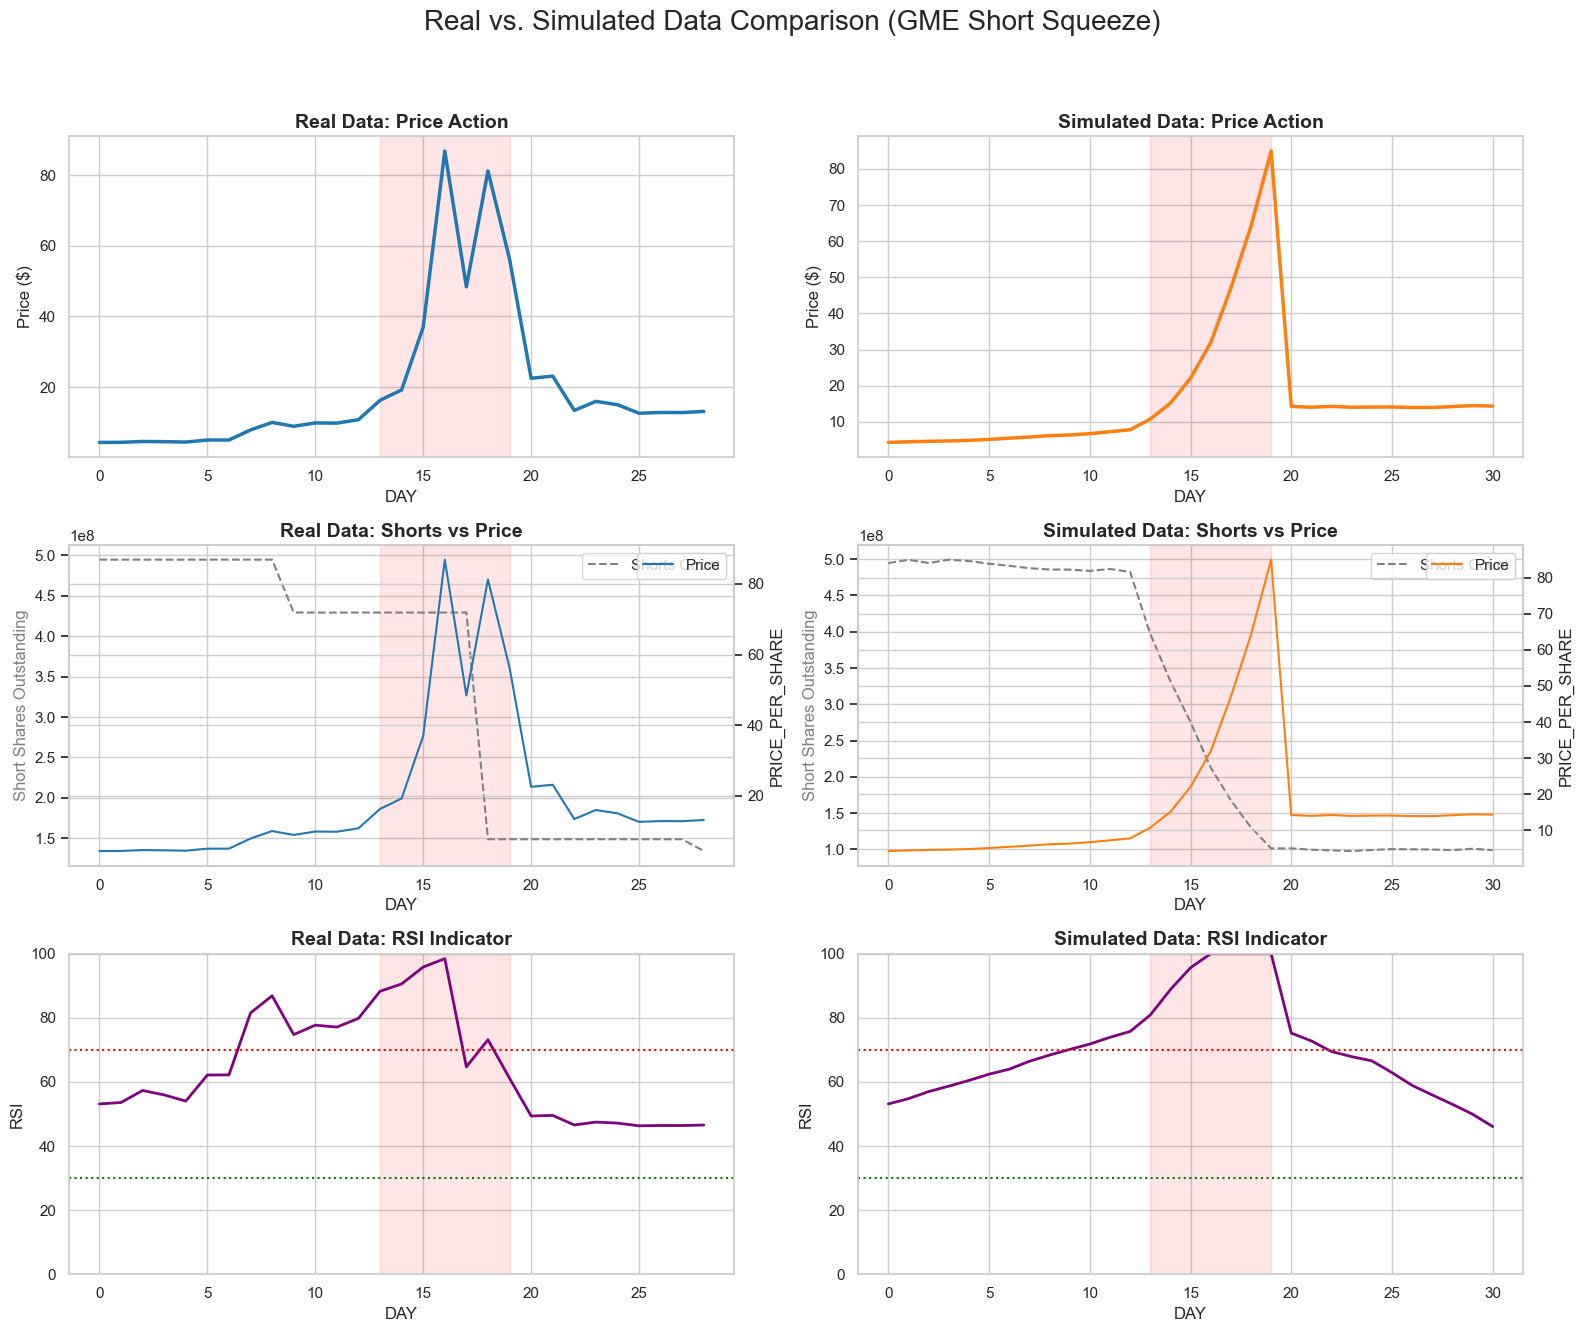

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

# Load Data
real_df = pd.read_csv("real_data_code/GME_api_ss.csv")
sim_df = pd.read_csv("data/GME.csv")

sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})
colors = {'real': '#1f77b4', 'sim': '#ff7f0e', 'squeeze': '#2ca02c'}

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Real vs. Simulated Data Comparison (GME Short Squeeze)', fontsize=20, y=0.98)

# Helper function to add squeeze shading
def add_squeeze_shade(ax, df, color='red', alpha=0.1):
    squeeze_days = df[df['SS'] == 1]['DAY']
    if not squeeze_days.empty:
        start = squeeze_days.min()
        end = squeeze_days.max()
        # Add shading for squeeze period
        ax.axvspan(start, end, color=color, alpha=alpha, label='Squeeze Period (SS=1)')

# PLOT 1: Price Action Comparison
# Real Data
sns.lineplot(data=real_df, x='DAY', y='PRICE_PER_SHARE', ax=axes[0,0], color=colors['real'], linewidth=2.5)
add_squeeze_shade(axes[0,0], real_df)
axes[0,0].set_title('Real Data: Price Action', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Price ($)')

# Simulated Data
sns.lineplot(data=sim_df, x='DAY', y='PRICE_PER_SHARE', ax=axes[0,1], color=colors['sim'], linewidth=2.5)
add_squeeze_shade(axes[0,1], sim_df)
axes[0,1].set_title('Simulated Data: Price Action', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Price ($)')

# PLOT 2: Shorts Covering Analysis
# Real Data
ax2 = axes[1,0].twinx()
sns.lineplot(data=real_df, x='DAY', y='SHORTS', ax=axes[1,0], color='grey', linestyle='--', label='Shorts Count')
sns.lineplot(data=real_df, x='DAY', y='PRICE_PER_SHARE', ax=ax2, color=colors['real'], label='Price')
add_squeeze_shade(axes[1,0], real_df)
axes[1,0].set_title('Real Data: Shorts vs Price', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Short Shares Outstanding', color='grey')

# Simulated Data
ax2_sim = axes[1,1].twinx()
sns.lineplot(data=sim_df, x='DAY', y='SHORTS', ax=axes[1,1], color='grey', linestyle='--', label='Shorts Count')
sns.lineplot(data=sim_df, x='DAY', y='PRICE_PER_SHARE', ax=ax2_sim, color=colors['sim'], label='Price')
add_squeeze_shade(axes[1,1], sim_df)
axes[1,1].set_title('Simulated Data: Shorts vs Price', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Short Shares Outstanding', color='grey')

# PLOT 3: RSI Evolution
# Real Data
sns.lineplot(data=real_df, x='DAY', y='RSI', ax=axes[2,0], color='purple', linewidth=2)
axes[2,0].axhline(70, color='red', linestyle=':', label='Overbought (70)')
axes[2,0].axhline(30, color='green', linestyle=':', label='Oversold (30)')
add_squeeze_shade(axes[2,0], real_df)
axes[2,0].set_title('Real Data: RSI Indicator', fontsize=14, fontweight='bold')
axes[2,0].set_ylabel('RSI')
axes[2,0].set_ylim(0, 100)

# Simulated Data
sns.lineplot(data=sim_df, x='DAY', y='RSI', ax=axes[2,1], color='purple', linewidth=2)
axes[2,1].axhline(70, color='red', linestyle=':', label='Overbought (70)')
axes[2,1].axhline(30, color='green', linestyle=':', label='Oversold (30)')
add_squeeze_shade(axes[2,1], sim_df)
axes[2,1].set_title('Simulated Data: RSI Indicator', fontsize=14, fontweight='bold')
axes[2,1].set_ylabel('RSI')
axes[2,1].set_ylim(0, 100)

# Final Layout Adjustments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
